# Métodos básicos de previsão de séries temporais

Nesse texto aborda-se os modelos básicos de previsão.

Qualquer método de previsão que for desenvolver será comparado aos métodos simples para garantir que o novo método seja melhor do que essas alternativas simples fazendo com que não vale a pena considerar o novo método.

In [208]:
import pandas as pd  # Importa a biblioteca pandas para manipulação de dados em formato de tabela
import numpy as np  # Importa a biblioteca numpy para manipulação de arrays e cálculos numéricos
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para criação de gráficos
import seaborn as sns  # Importa a biblioteca seaborn para visualização de dados estatísticos
np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.3f}'.format}, linewidth=130)  # Configura as opções de exibição dos números em formato de ponto flutuante
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # Configura o formato de exibição dos números em um DataFrame do pandas

In [209]:
indicadores = pd.read_csv('dados_ibc.csv', sep = ';')
consumo = pd.read_csv('consumo_residencial_energia_brasil.csv', sep = ';')
# Obtém os dados de trienamento do indice inicial até o índice que contempla 80% dos dados
train_consumo = consumo.head(int(len(consumo) * 0.8))
# Obtém os dados de teste com base nas últimas 20% linhas
test_consumo = consumo.tail(int(len(consumo) * 0.2))
# Obtém os dados de trienamento do indice inicial até o índice que contempla 80% dos dados
train_indicadores = indicadores.head(int(len(consumo) * 0.8))
# Obtém os dados de teste com base nas últimas 20% linhas
test_indicadores = indicadores.tail(int(len(consumo) * 0.2))

In [182]:
# Definir a função plotar que recebe os seguintes parâmetros:
# train: DataFrame com os dados de treinamento
# test: DataFrame com os dados de teste
# title: Título do gráfico
# x: Nome da coluna que representa o eixo x
# y: Nome da coluna que representa o eixo y
# previsao: Lista com os valores previstos
def plotar(train, test, title, x, y, previsao):
    # Configurar o estilo do gráfico utilizando o seaborn
    sns.set(style="whitegrid", font_scale=1.2)
    # Criar uma nova figura e eixo
    fig, ax = plt.subplots(figsize=(10, 6))
    # Plotar os dados de treinamento como uma linha
    ax.plot(train[x], train[y], label='Train')
    # Plotar os dados de teste como uma linha
    ax.plot(test[x], test[y], label='Test')
    # Plotar as previsões como uma linha
    ax.plot(test[x], previsao, label='previsao')
    # Definir o título do gráfico
    ax.set_title(title)
    # Definir os rótulos dos eixos
    ax.set_xlabel('Mês')
    ax.set_ylabel(title)
    # Adicionar uma legenda
    ax.legend()
    # Configurar a rotação dos rótulos do eixo x
    plt.xticks(rotation=90)
    # Configurar o intervalo de rotulos do eixo x
    plt.xticks(range(0, len(train) + len(test), 6))
    # Exibir o gráfico
    plt.show()

## Método média simples

Este modelo simplesmente assume que todos os valores futuros são iguais à média de todas as observações anteriores.

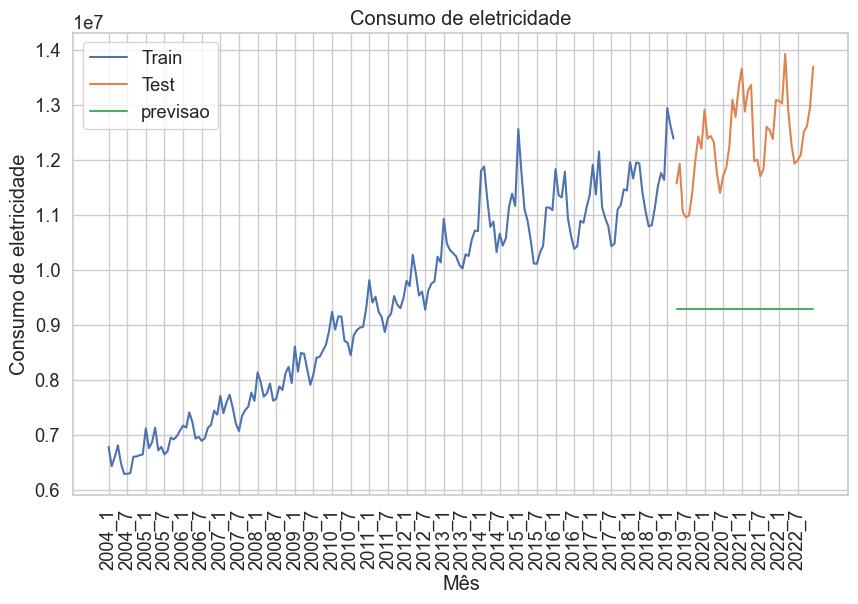

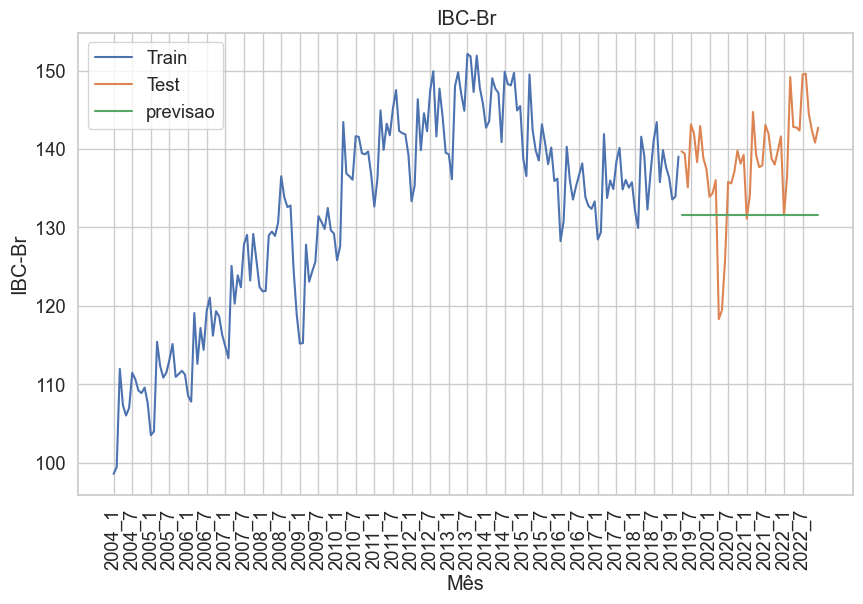

In [183]:
# Definir o valor da coluna 'previsao_media' dos dados de teste como a média da coluna 'total_mes' dos dados de treinamento
test_consumo['previsao_media'] = train_consumo['total_mes'].mean()
# Atribuir os valores da coluna 'previsao_media' como as previsões para o consumo de eletricidade
previsao = test_consumo['previsao_media']
# Chamar a função 'plotar' passando os dados de treinamento, os dados de teste, o título do gráfico, a coluna para o eixo x, a coluna para o eixo y e as previsões
plotar(train_consumo, test_consumo, 'Consumo de eletricidade', 'ano_mes', 'total_mes', previsao)

# Definir o valor da coluna 'previsao_media' dos indicadores como a média da coluna 'valor' dos dados de treinamento dos indicadores
test_indicadores['previsao_media'] = train_indicadores['valor'].mean()
# Atribuir os valores da coluna 'previsao_media' como as previsões para o IBC-Br
previsao = test_indicadores['previsao_media']
# Chamar a função 'plotar' passando os dados de treinamento dos indicadores, os dados de teste dos indicadores, o título do gráfico, a coluna para o eixo x, a coluna para o eixo y e as previsões
plotar(train_indicadores, test_indicadores, 'IBC-Br', 'ano_mes', 'valor', previsao)

## Método Naïve

A previsão naïve define a previsão futura igual ao último valor observado.

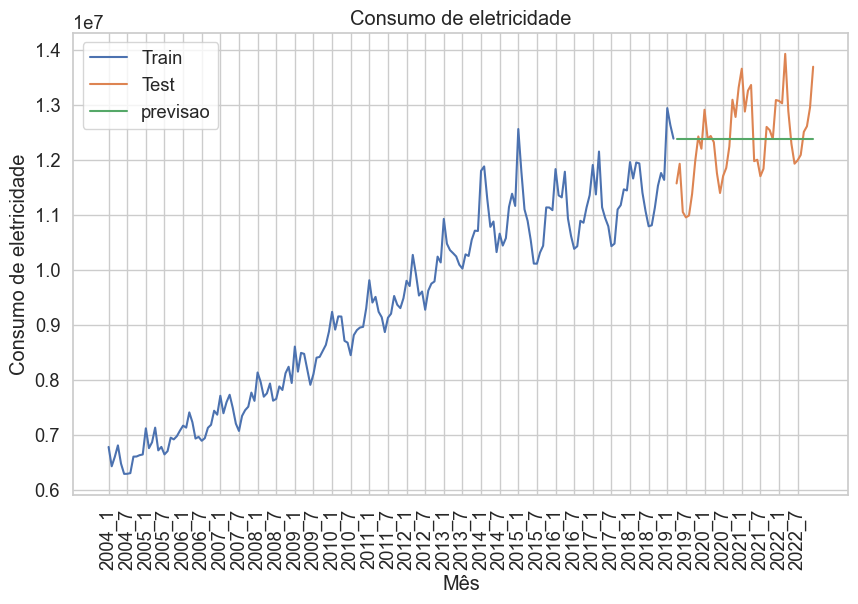

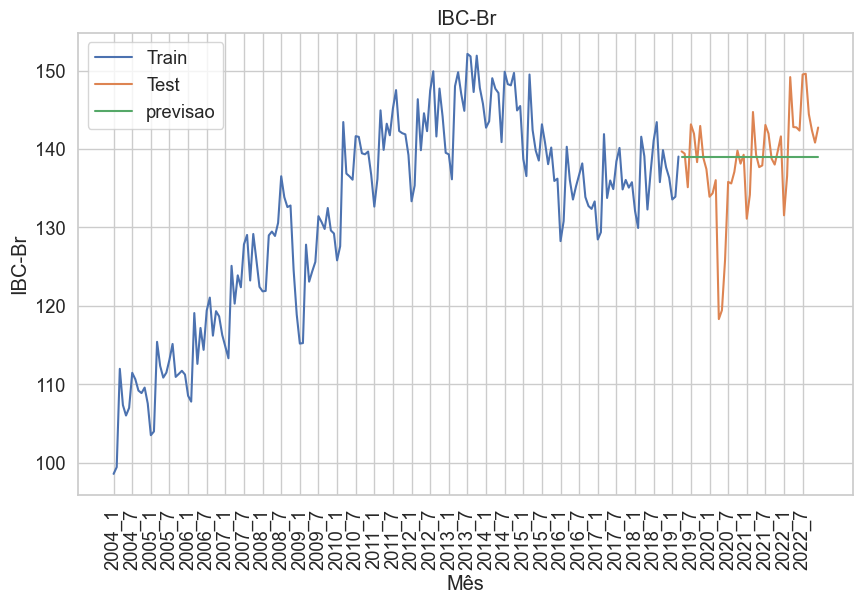

In [184]:
# Consumo de eletricidade
# Definindo a previsão do método naive para os dados de consumo de eletricidade
test_consumo['previsao_naive'] = train_consumo['total_mes'].iloc[-1]
# Atribuindo a previsão do método naive à variável 'previsao' para os dados de consumo de eletricidade
previsao = test_consumo['previsao_naive']
# Chamando a função 'plotar' para plotar o gráfico dos dados de consumo de eletricidade com as previsões
plotar(train_consumo, test_consumo, 'Consumo de eletricidade', 'ano_mes', 'total_mes', previsao)

# IBC-Br
# Definindo a previsão do método naive para os dados do IBC-Br (indicadores econômicos)
test_indicadores['previsao_naive'] = train_indicadores['valor'].iloc[-1]
# Atribuindo a previsão do método naive à variável 'previsao' para os dados do IBC-Br
previsao = test_indicadores['previsao_naive']
# Chamando a função 'plotar' para plotar o gráfico dos dados do IBC-Br com as previsões
plotar(train_indicadores, test_indicadores, 'IBC-Br', 'ano_mes', 'valor', previsao)

## Método naïve sazonal

No método "naïve" sazonal, cada previsão é definida como igual ao último valor observado da mesma temporada. Por exemplo, no caso de dados mensais, a previsão para um determinado mês é igual ao valor observado para o mesmo mês do ano anterior. Essa abordagem simples assume que a sazonalidade se repete de forma consistente ao longo do tempo.

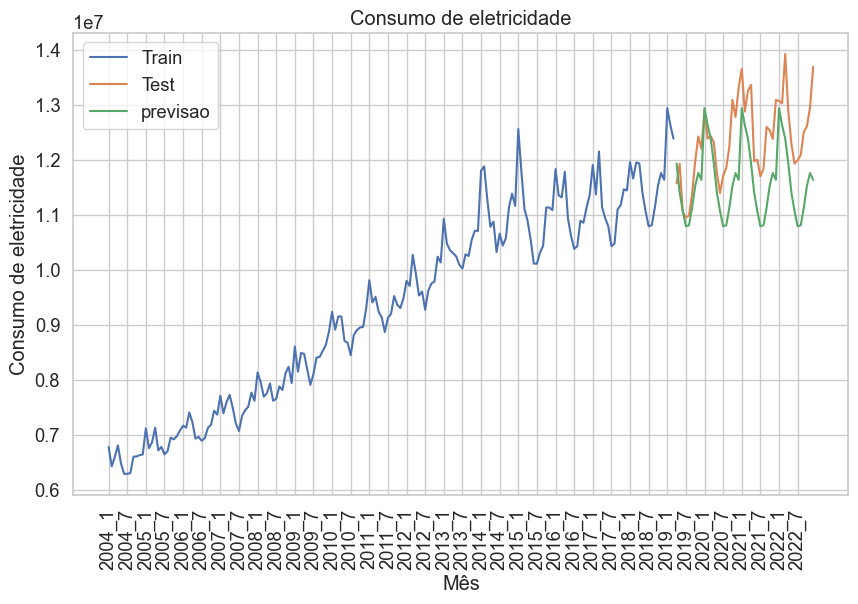

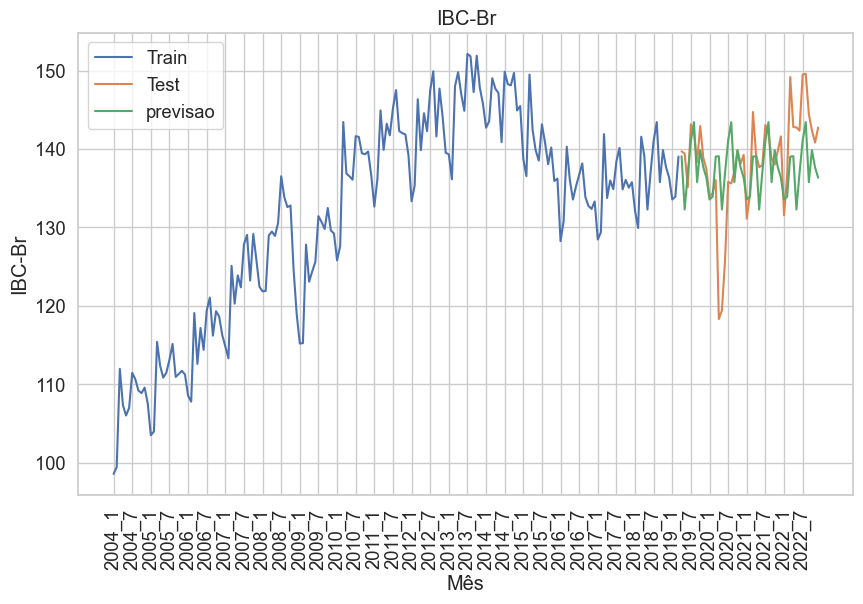

In [192]:
# Previsão de Consumo de Eletricidade usando o método Seasonal Naive
previsoes = []  # Lista para armazenar as previsões
for _, idx in enumerate(test_consumo.index.values):
    mes = test_consumo.loc[idx, 'mes']
    # Filtrar o valor do mesmo mês do ano imediatamente anterior nos dados disponpiveis de treinamento
    previsao = train_consumo[(train_consumo['mes'] == mes)]['total_mes'].values[-1]
    previsoes.append(previsao)

# Plotar o gráfico dos dados de Consumo de Eletricidade com as previsões do método Seasonal Naive
plotar(train_consumo, test_consumo, 'Consumo de eletricidade', 'ano_mes', 'total_mes', previsoes)

# Previsão do Indicador IBC-Br usando o método Seasonal Naive
previsoes = []  # Lista para armazenar as previsões
for _, idx in enumerate(test_indicadores.index.values):
    mes = test_indicadores.loc[idx, 'mes']
    # Filtrar o valor do mesmo mês do ano imediatamente anterior nos dados disponíveis de treinamento
    previsao = train_indicadores[(train_indicadores['mes'] == mes)]['valor'].values[-1]
    previsoes.append(previsao)

# Plotar o gráfico dos dados do Indicador IBC-Br com as previsões do método Seasonal Naive
plotar(train_indicadores, test_indicadores, 'IBC-Br', 'ano_mes', 'valor', previsoes)

## Método Drift

Uma variação do método Naive é permitir que as previsões aumentem ou diminuam ao longo do tempo, onde a quantidade de mudança ao longo do tempo (chamada de drift) é definida como a mudança média vista nos dados históricos.

<img src = "formula_metodo_drift.png"/>

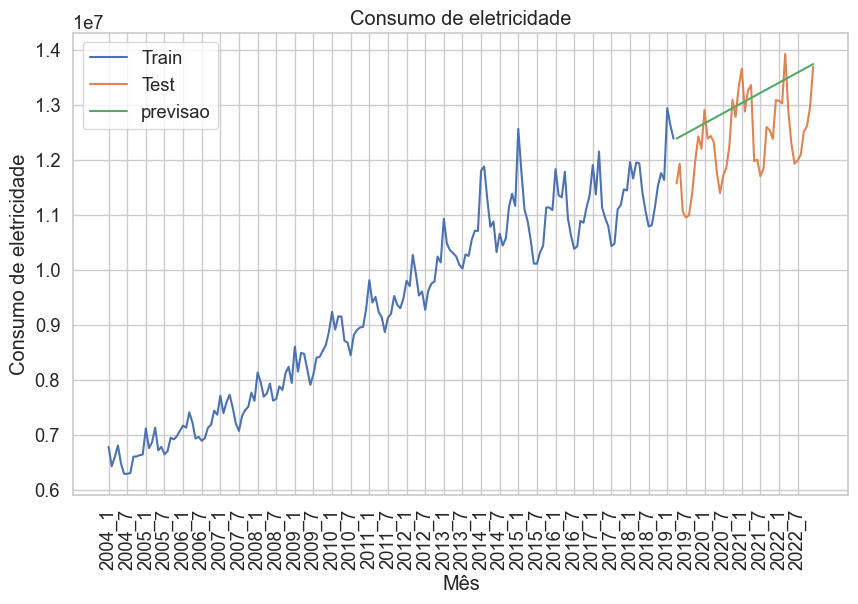

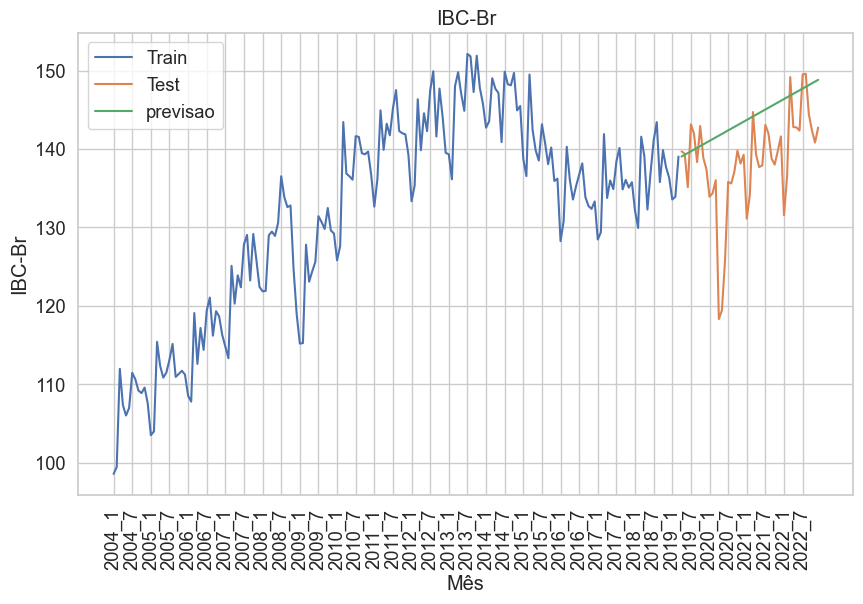

In [193]:
# Consumo de eletricidade
# Calcular a constantee de aumento/diminuição com base na diferença entre o último e o primeiro valor dos dados de treinamento
constante = (train_consumo['total_mes'].iloc[-1] - train_consumo['total_mes'].iloc[0]) / (len(train_consumo) - 1)
# Adicionar a coluna 'h' aos dados de teste, contendo uma sequência numérica de 0 até o tamanho dos dados de teste
test_consumo['h'] = range(len(test_consumo))
# Calcular as previsões com base no método de drift, utilizando a constantee e o valor da coluna 'h'
test_consumo['drift_previsao'] = train_consumo['total_mes'].iloc[-1] + test_consumo['h'] * constante
# Chamar a função 'plotar' passando os dados de treinamento, os dados de teste, o título do gráfico, a coluna para o eixo x, a coluna para o eixo y e as previsões
plotar(train_consumo, test_consumo, 'Consumo de eletricidade', 'ano_mes', 'total_mes', test_consumo['drift_previsao'])

# IBC-Br
# Calcular a constantee de aumento/diminuição com base na diferença entre o último e o primeiro valor dos dados de treinamento dos indicadores
constante = (train_indicadores['valor'].iloc[-1] - train_indicadores['valor'].iloc[0]) / (len(train_indicadores) - 1)
# Adicionar a coluna 'h' aos dados de teste dos indicadores, contendo uma sequência numérica de 0 até o tamanho dos dados de teste dos indicadores
test_indicadores['h'] = range(len(test_indicadores))
# Calcular as previsões com base no método de drift para os indicadores, utilizando a constantee e o valor da coluna 'h'
test_indicadores['drift_previsao'] = train_indicadores['valor'].iloc[-1] + test_indicadores['h'] * constante
# Chamar a função 'plotar' passando os dados de treinamento dos indicadores, os dados de teste dos indicadores, o título do gráfico, a coluna para o eixo x, a coluna para o eixo y e as previsões
plotar(train_indicadores, test_indicadores, 'IBC-Br', 'ano_mes', 'valor', test_indicadores['drift_previsao'])

 ## Referências: 
 
- https://otexts.com/fpp2/simple-methods.html
- https://towardsdatascience.com/basic-forecasting-techniques-ef4295248e46